In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os
import sys

sys.path.append("../python")

from data import Dataloader
from models import RandomExampleModel ,TwoClustersMIP, ThreeClustersMIP
import metrics



In [2]:
# Loading the data
data_loader = Dataloader("../data/dataset_10") # Specify path to the dataset you want to load
X, Y = data_loader.load()
Z = data_loader.get_ground_truth_labels()


### Réduction des données par moyennage

In [4]:
from group_pairs import GroupPairer

pairer = GroupPairer()
pairer.group_pairs(X, Y, 2)

{(0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1): [0],
 (0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0): [1],
 (0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0): [2],
 (1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0): [3],
 (1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0): [4],
 (1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1): [5],
 (1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1): [6],
 (1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1): [7],
 (1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1): [8],
 (0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1): [9],
 (0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0): [10],
 (0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0): [11],
 (0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0): [12],
 (1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1): [13],
 (1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 

### Affichage des données

In [4]:
print(X, X.shape)
# 2000 produits, chaque produit est représenté par un nombre

[[0.45360563 0.25691407 0.71509031 0.90380217]
 [0.83007226 0.03330589 0.51154491 0.33237916]
 [0.89127263 0.22972051 0.20723437 0.38867979]
 ...
 [0.35027025 0.71528994 0.9643526  0.07108899]
 [0.86841743 0.62463507 0.57294492 0.06943392]
 [0.28662264 0.46035174 0.68115753 0.01358976]] (2000, 4)


In [5]:
print(Y, Y.shape)

[[0.5571581  0.83223381 0.79529317 0.11810177]
 [0.77086066 0.94477142 0.82162636 0.0327517 ]
 [0.1133259  0.87261103 0.66352082 0.14427871]
 ...
 [0.85930155 0.31976972 0.35221687 0.78899912]
 [0.44337222 0.01132995 0.30873655 0.38243299]
 [0.32834185 0.05977377 0.84817152 0.1934778 ]] (2000, 4)


In [6]:
print(Z, Z.shape)

[0 0 0 ... 1 1 1] (2000,)


### Entraînement d'un modèle aléatoire

In [5]:
# Let's train an example model
model = RandomExampleModel() # Instantiation of the model with hyperparameters, if needed
model.fit(X, Y) # Training of the model, using preference data

In [7]:
# First, let's see how our model reconsiders our preferences
# Our data preferences were X[i] >> Y[i] for all i, let's see if our model agrees
print((model.predict_utility(X) - model.predict_utility(Y))[:5]) # Preferred item has a higher utility
print(model.predict_utility(X)[:5])
print(model.predict_utility(Y)[:5])

# predict_utility returns utility of samples for each cluster, returning shape (n_samples, n_clusters)

[[-0.06326043 -0.18471619]
 [-0.20129649 -0.33004454]
 [ 0.00500771 -0.09058298]
 [ 0.07658458  0.12828252]
 [-0.06293998 -0.07432317]]
[[0.58784814 0.5184542 ]
 [0.53863346 0.476744  ]
 [0.45795201 0.43516468]
 [0.51788081 0.47398788]
 [0.33944544 0.36321772]]
[[0.65110857 0.7031704 ]
 [0.73992996 0.80678855]
 [0.4529443  0.52574767]
 [0.44129623 0.34570536]
 [0.40238542 0.4375409 ]]


In [9]:
# Or we can directly use the predict_preference method:
print(model.predict_preference(X, Y)[:5]) # For each cluster we see if X is preferred to Y (0) or the contrary (1)
# predict_preference returns preference of samples for each cluster, returning shape (n_samples, n_clusters)
# 0 means that the cluster prefers first argument (here X[i]), 1 means that the cluster prefers second argument (here Y[i])

[[0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]]


### Entraînement d'un modèle MIP

In [12]:
mipModel = TwoClustersMIP(n_pieces=5, n_clusters=3, n_criteria=10) # Instantiation of the model with hyperparameters, if needed
mipModel.fit(X, Y) # Training of the model, using preference data
# mipModel.fit(X[::10], Y[::10]) # Training of the model, using preference data

KeyboardInterrupt: 

In [4]:
# We consider that our model explains our data, if for at least one cluster, X[i] >> Y[i]
pairs_explained = np.sum(mipModel.predict_preference(X[::10], Y[::10]) == 0, axis=1) # For each sample check if each clusters prefers X[i] (then is True)
pairs_explained = pairs_explained > 0 # If at least one cluster prefers X[i], then X[i] >> Y[i] is explained
print("Percentage of explained preferences for 5 first samples:", 1000 * np.sum(pairs_explained) / len(X), '%') # Get % or explained pairs

Percentage of explained preferences for 5 first samples: 97.0 %


In [5]:
mipModel.sigma

{0: <gurobi.Var sigma[0] (value 0.0)>,
 1: <gurobi.Var sigma[1] (value 0.0)>,
 2: <gurobi.Var sigma[2] (value 0.0)>,
 3: <gurobi.Var sigma[3] (value 0.0)>,
 4: <gurobi.Var sigma[4] (value 0.0)>,
 5: <gurobi.Var sigma[5] (value 0.0)>,
 6: <gurobi.Var sigma[6] (value 0.0)>,
 7: <gurobi.Var sigma[7] (value 0.0)>,
 8: <gurobi.Var sigma[8] (value 0.0)>,
 9: <gurobi.Var sigma[9] (value 0.0)>,
 10: <gurobi.Var sigma[10] (value 0.0)>,
 11: <gurobi.Var sigma[11] (value 0.0)>,
 12: <gurobi.Var sigma[12] (value 0.0)>,
 13: <gurobi.Var sigma[13] (value 0.0)>,
 14: <gurobi.Var sigma[14] (value 0.0)>,
 15: <gurobi.Var sigma[15] (value 0.0)>,
 16: <gurobi.Var sigma[16] (value 0.0)>,
 17: <gurobi.Var sigma[17] (value 0.0)>,
 18: <gurobi.Var sigma[18] (value 0.0)>,
 19: <gurobi.Var sigma[19] (value 0.0)>,
 20: <gurobi.Var sigma[20] (value 0.0)>,
 21: <gurobi.Var sigma[21] (value 0.0)>,
 22: <gurobi.Var sigma[22] (value 0.0)>,
 23: <gurobi.Var sigma[23] (value 0.0)>,
 24: <gurobi.Var sigma[24] (value 0.

In [6]:
j = 1999
print(mipModel.predict(X[j]))
print(mipModel.predict(Y[j]))
print(mipModel.predict_preference([X[j]], [Y[j]]))  # 1 si X est préféré à Y, 0 sinon

[0.08681075 0.12381928]
[0.17229148 0.18991445]
[[0 0]]


In [7]:
sum(mipModel.score_X[0, j, i].X for i in range(mipModel.n))

0.0

In [8]:
mipModel.score_X

{(0, 0, 0): <gurobi.Var score_X[0,0,0] (value 0.0)>,
 (0, 0, 1): <gurobi.Var score_X[0,0,1] (value 0.0)>,
 (0, 0, 2): <gurobi.Var score_X[0,0,2] (value 0.0)>,
 (0, 0, 3): <gurobi.Var score_X[0,0,3] (value 0.0)>,
 (0, 1, 0): <gurobi.Var score_X[0,1,0] (value 0.0)>,
 (0, 1, 1): <gurobi.Var score_X[0,1,1] (value 0.0)>,
 (0, 1, 2): <gurobi.Var score_X[0,1,2] (value 0.0)>,
 (0, 1, 3): <gurobi.Var score_X[0,1,3] (value 0.0)>,
 (0, 2, 0): <gurobi.Var score_X[0,2,0] (value 0.0)>,
 (0, 2, 1): <gurobi.Var score_X[0,2,1] (value 0.0)>,
 (0, 2, 2): <gurobi.Var score_X[0,2,2] (value 0.0)>,
 (0, 2, 3): <gurobi.Var score_X[0,2,3] (value 0.0)>,
 (0, 3, 0): <gurobi.Var score_X[0,3,0] (value 0.0)>,
 (0, 3, 1): <gurobi.Var score_X[0,3,1] (value 0.0)>,
 (0, 3, 2): <gurobi.Var score_X[0,3,2] (value 0.0)>,
 (0, 3, 3): <gurobi.Var score_X[0,3,3] (value 0.0)>,
 (0, 4, 0): <gurobi.Var score_X[0,4,0] (value 0.0)>,
 (0, 4, 1): <gurobi.Var score_X[0,4,1] (value 0.0)>,
 (0, 4, 2): <gurobi.Var score_X[0,4,2] (value 

array([0.45360563, 0.25691407, 0.71509031, 0.90380217])

In [9]:
print(mipModel.predict_utility(X[:5]))
print(mipModel.predict_utility(Y[:5]))

[[0.32111032 0.35418022]
 [0.17316935 0.22986508]
 [0.22192288 0.22192288]
 [0.16998013 0.18812727]
 [0.11788006 0.11788006]]
[[0.19500212 0.21876275]
 [0.47280286 0.49350695]
 [0.13795286 0.17700851]
 [0.30081392 0.34087146]
 [0.20101857 0.20101857]]


In [9]:
mipModel.predict(X[0])

array([0.32111032, 0.35418022])

In [23]:
X[0]

array([0.45360563, 0.25691407, 0.71509031, 0.90380217])

In [10]:
mipModel.score_one_var(X[0][3], k=0, i=3)

0.21397737014704407

In [10]:
[mipModel.x[0, 1, l].X for l in range(6)]

[0.0,
 0.8286179595450935,
 0.8300667866172282,
 0.8312338122157106,
 0.8322338122157094,
 1.0]

In [13]:
[mipModel.u[0, 1, l].X for l in range(6)]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.25]

In [5]:
# Or we call directly the right metric:
pairs_explained = metrics.PairsExplained()
print("Percentage of explained preferences for all samples:", pairs_explained.from_model(mipModel, X, Y))
# Or other possibility:
print("Percentage of explained preferences for all samples:", pairs_explained(mipModel.predict_utility(X), mipModel.predict_utility(Y)))

Percentage of explained preferences for all samples: 0.998
Percentage of explained preferences for all samples: 0.998


In [32]:
# Now, we can also see how our model clusters our data
print(mipModel.predict_cluster(X, Y)) # Returns for each sample which cluster is the most likely to have generated the preference.
# The most likely cluster is the one with the highest utility difference U(X[i])-U(Y[i]) for the sample.

[0 1 1 ... 0 1 0]


In [33]:
mipModel.predict_cluster(X, Y).tolist()

[0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [6]:
# Ground truth are also provided:
Z = data_loader.get_ground_truth_labels()
# We can see how it compares to our model's predictions:
print(Z[:5])

[0 0 0 1 0]


In [7]:
# We have a metric to calculate how well the model has regrouped the preferences pairs compared to ground truth:
cluster_intersection = metrics.ClusterIntersection()

print("Cluster intersection for 5 first samples:", cluster_intersection(mipModel.predict_cluster(X, Y)[:5], Z[:5]))

# Then for all data:
print("Cluster intersection for all samples:", cluster_intersection(mipModel.predict_cluster(X, Y), Z))
print("Cluster intersection for all samples:", cluster_intersection.from_model(mipModel, X, Y, Z))

Cluster intersection for 5 first samples: 1.0
Cluster intersection for all samples: 0.9960060030015008
Cluster intersection for all samples: 0.9960060030015008


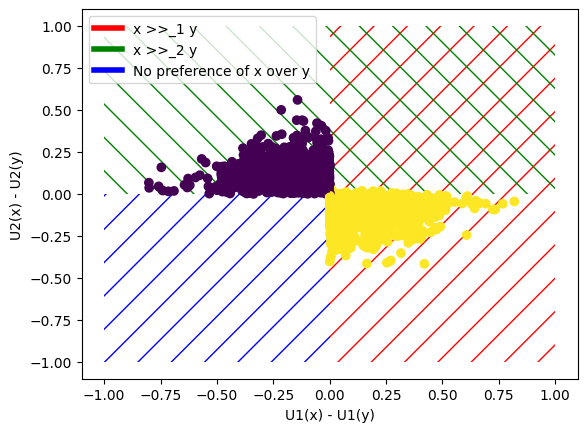

In [8]:
# Here is a proposition of a useful plot to see how the model clusters the data:
# We look at how each cluster evaluates U(x) - U(y) and color with ground truth clustering
# Note that x >>_1 y means that x is preferred to y for cluster 1
model = mipModel

from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

plt.figure()
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")

plt.gca().add_patch(Rectangle((0,-1.),1., 2.,
                    edgecolor='red',
                    facecolor='none',
                    lw=0, 
                    hatch='/'))
plt.gca().add_patch(Rectangle((-1.,0), 2., 1.,
                    edgecolor='green',
                    facecolor='none',
                    lw=0, 
                    hatch='\\'))
plt.gca().add_patch(Rectangle((-1.,-1.),1., 1.,
                    edgecolor='blue',
                    facecolor='none',
                    hatch='/',
                    lw=0))
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0], 
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1], c=Z)

custom_lines = [Line2D([0], [0], color="red", lw=4),
                Line2D([0], [0], color="green", lw=4),
                Line2D([0], [0], color="b", lw=4)]

plt.legend(custom_lines, ['x >>_1 y', "x >>_2 y ", 'No preference of x over y'])
plt.show()

Our random model cannot explain a large part of our preference data. Your first assigment will be to write a Mixed-Interger Programming algorithm that will be able to do so.

In [ ]:
# This cell should work when you have completed the TwoClustersMIP model
from models import TwoClustersMIP

parameters = {"n_pieces": 5,} # Can be completed
model = TwoClustersMIP(**parameters)
model.fit(X, Y)

# Uncomment once your model is working
# print("Percentage of explained preferences on train data:", pairs_explained.from_model(model, X, Y)) # You should get 1.0 with the right MIP
# print("Percentage of preferences well regrouped into clusters:", cluster_intersection.from_model(model, X, Y, Z))

In [ ]:
# As an example here are the results obtained with:
""" # Uncomment the code to check your results
plt.figure()
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0], 
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1], c=Z)
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")
plt.show()
"""
# Here is how it should look like
from IPython.display import Image
Image("../images/MIP_results_example.png")

Your second assignement will be to find another model that will work well with larger data instances.